# **Clasificación de Flores de Iris / Iris Flower Classification**
--- 
El conjunto de datos Seaborn Iris es un conjunto clásico y ampliamente utilizado en ciencia de datos y aprendizaje automático, especialmente para demostrar tareas de visualización y clasificación de datos. 
Contenido del conjunto de datos Iris:
El conjunto de datos contiene mediciones de diversas características de tres especies diferentes de flores de iris. En concreto, incluye: 
- sepal_length: longitud del sépalo (en cm).
- sepal_width: ancho del sépalo (en cm).
- petal_length: longitud del pétalo (en cm).
- petal_width: ancho del pétalo (en cm).
- species: El tipo de flor de iris, que puede ser una de tres especies: Iris setosa, Iris versicolor o Iris virginica.

El objetivo es clasificar las flores Iris de entre las tres especies de acuerdo a longitud y ancho de sépalos y pétalos.

<p align="center"> 
  <img src="docs/iris_flower.png" alt="Descripcion Flores de Iris" width="800"/>
</p>

  <img src="/Iris Flower Classification/docs/iris_flower.png" alt="Descripcion Flores de Iris" width="600"/>

  <img src="./docs/iris_flower.png" alt="Descripcion Flores de Iris" width="800"/>

  ![FLores de Iris](docs/iris_flower.png)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Exploración del dataset**
---

### **Carga de datos**

In [5]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [27]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Primeras Observaciones**

El dataset cuenta con 150 instancias y podemos observar que no hay valores nulos.

### **Visualización del Dataset**

**Pairplot**

Con un gráfico Pairplot podemos observar las relaciones de múltiples variables de manera compacta 

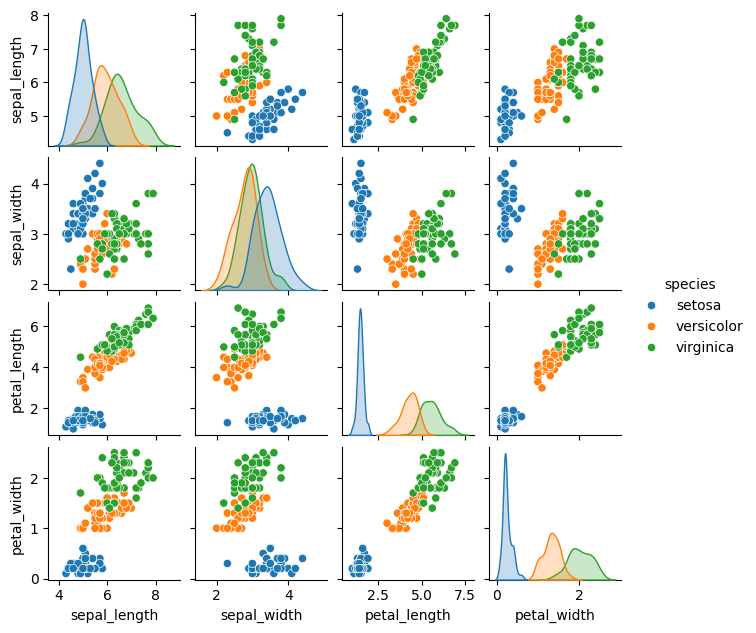

In [17]:
sns.pairplot(df, hue='species', height=1.6)

- Setosa es la más corta y Virginica es la mas larga
- Setosa se diferencia mucho de las otras especies

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

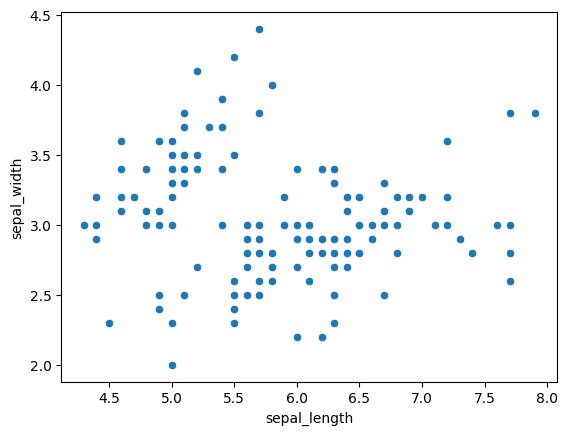

In [29]:
sns.scatterplot(df,x='sepal_length',y='sepal_width')

In [36]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

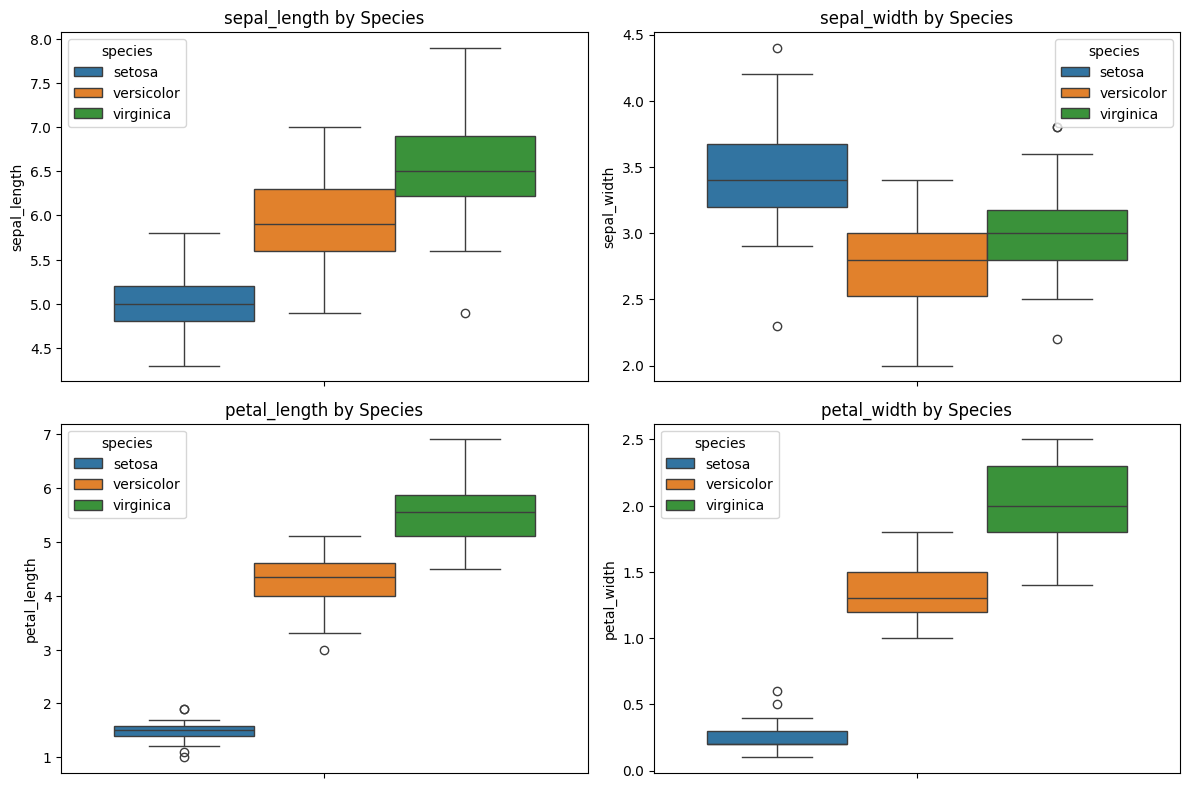

In [ ]:
features = df.columns.values

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(data=df, y=feature, hue='species', ax=ax)
    ax.set_title(f"{feature} by Species")

plt.tight_layout()
plt.show()

### **Data Splitting**
---

En **Machine Learning supervisado**, se debe separar el dataset en *features* (X) y *target* (y):  


- **Features (X):** son las variables de entrada que describen las características de cada muestra (en el caso de Iris: largo y ancho de sépalo y pétalo).  
- **Target (y):** es la variable que queremos predecir (en este caso, la especie de la flor).  

Esta separación permite que el algoritmo de clasificación aprenda un **mapeo entre las características y la clase a la que pertenece cada observación**, de modo que luego pueda predecir la especie de nuevas flores desconocidas.  
- Las **columnas verdes** representan las features: largo y ancho de sépalo, largo y ancho de pétalo.
- La **columna azul** representa el target: la especie de la flor.

<p align="center">
  <img src="docs/features_target.png" alt="Features - Target" width="600"/>
</p>

1. El dataset (X, y) se divide en Train set y Test set.
2. El Train set se usa para entrenar el modelo.
3. El Test set se reserva para evaluar el rendimiento del modelo en datos no vistos.

<p align="center">
  <img src="docs/train_set.png" alt="Train Set Ilustration" width="500"/>
</p>

In [22]:
data = df.values
X = data[:,0:4] #Toma todas las filas, las columnas 0,1,2,3
Y = data[:,4] #Toma todas las filas, la columna 4 (species)

In [20]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [21]:
print(Y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [41]:
len(X)

150

In [42]:
len(Y)

150